In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#Step 1


In [62]:
acb_data = pd.read_csv("D:\\Github anyud\\final\\Data_stock\\ACB Historical Data.csv")
aapl_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\AAPL Historical Data.csv')
bid_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\BID Historical Data.csv')
fpt_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\FPT Historical Data.csv')
googl_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\GOOGL Historical Data.csv')

Box Plot

In [76]:
# Function to clean and convert "Price" column to numeric
def clean_price_column(dataframe):
    # Checking the actual data type of the first few elements to determine if they are strings
    if dataframe["Price"].apply(type).eq(str).any():  # If any element is a string
        dataframe["Price"] = pd.to_numeric(dataframe["Price"].str.replace(',', '').str.replace('$', ''), errors='coerce')
    return dataframe

# # Function to plot box plot for "Price" column
# def plot_price_boxplot(dataframe, dataset_name):
#     if "Price" in dataframe.columns:
#         dataframe = clean_price_column(dataframe)
#         plt.figure(figsize=(8, 6))
#         plt.boxplot(dataframe["Price"].dropna())
#         plt.title(f"Box Plot for {dataset_name} Prices")
#         plt.ylabel("Price")
#         plt.grid(True)
#         plt.show()
#     else:
#         print(f"'Price' column not found in {dataset_name} dataset")

# # Plot box plot for the "Price" column of each dataset
# plot_price_boxplot(aapl_data, "AAPL")
# plot_price_boxplot(acb_data, "ACB")
# plot_price_boxplot(bid_data, "BID")
# plot_price_boxplot(fpt_data, "FPT")
# plot_price_boxplot(googl_data, "GOOGL")

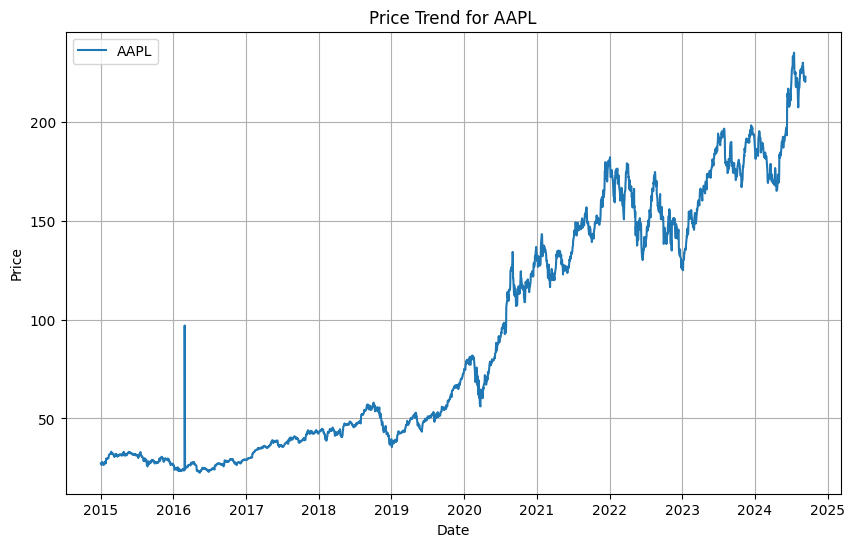

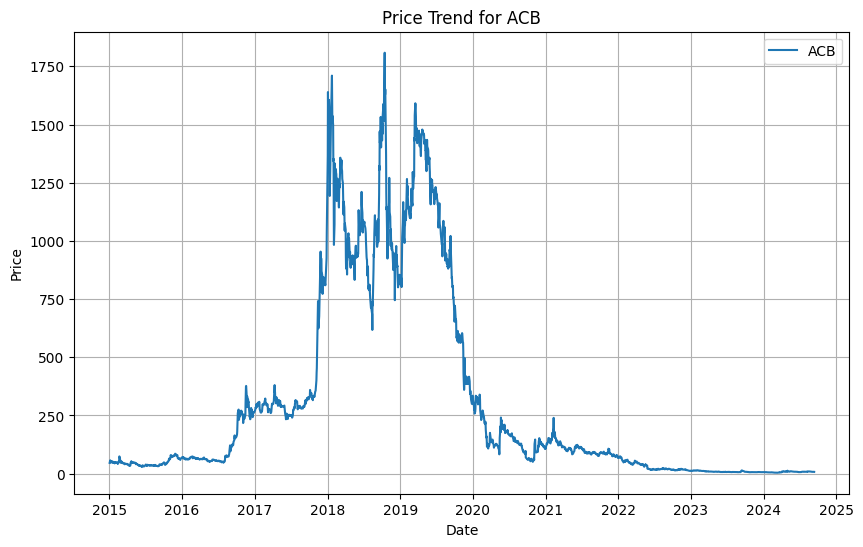

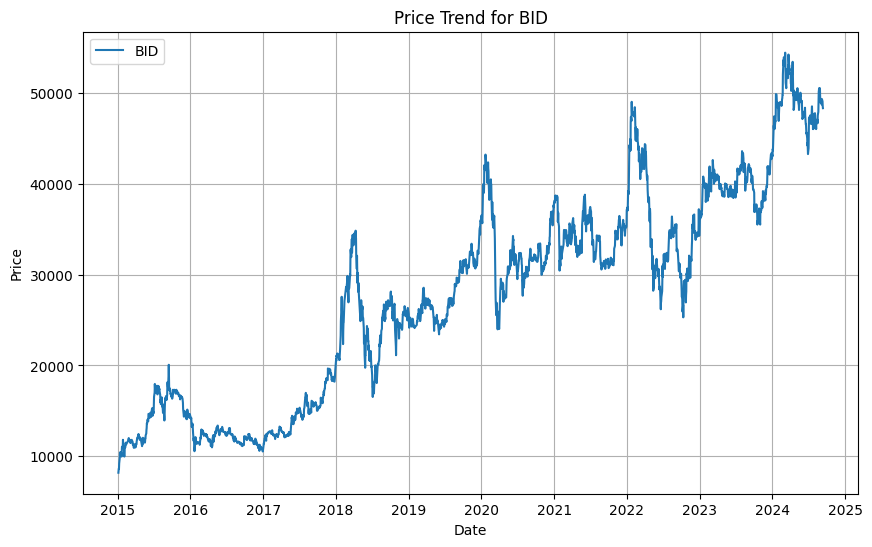

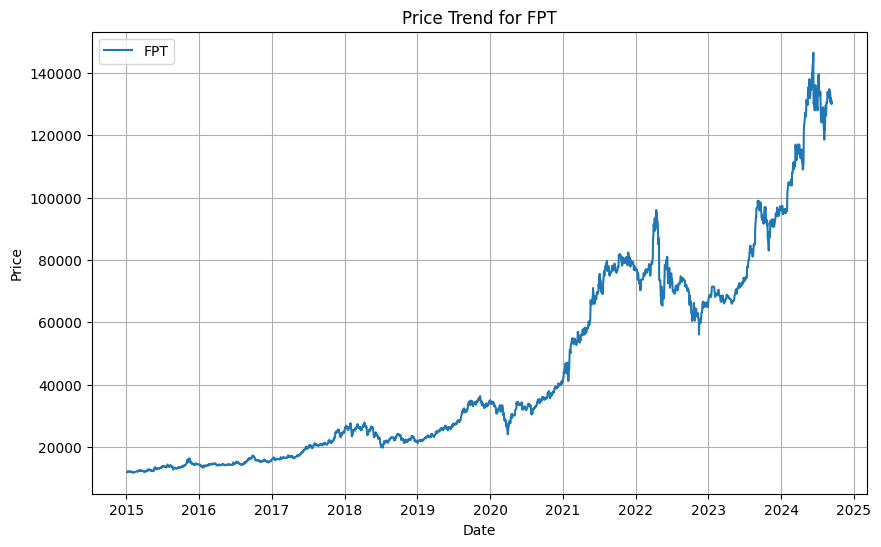

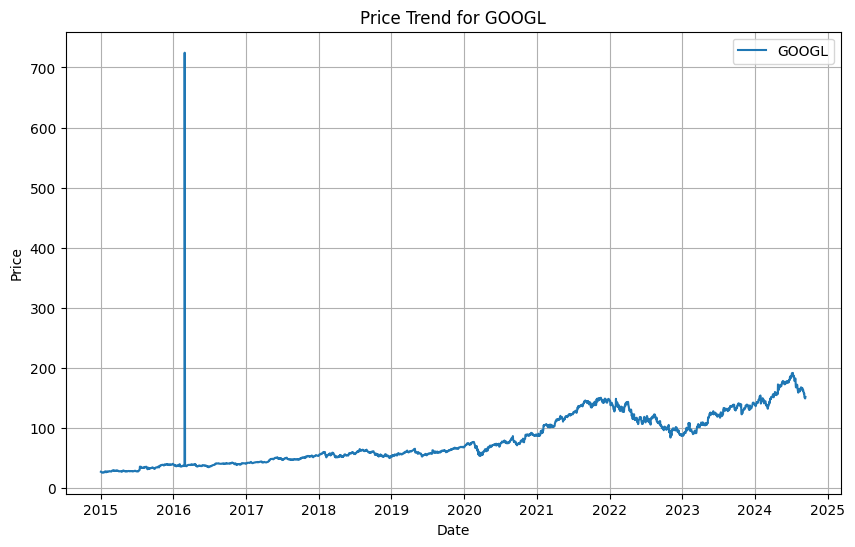

In [64]:
# Function to plot line plot for "Price" over "Date"
def plot_price_line(dataframe, dataset_name):
    if "Price" in dataframe.columns and "Date" in dataframe.columns:
        dataframe = clean_price_column(dataframe)
        dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors='coerce')  # Ensure Date is in datetime format
        plt.figure(figsize=(10, 6))
        plt.plot(dataframe['Date'], dataframe['Price'], label=dataset_name)
        plt.title(f"Price Trend for {dataset_name}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        print(f"'Price' or 'Date' column not found in {dataset_name} dataset")

# Plot line chart for the "Price" column over time for each dataset
plot_price_line(aapl_data, "AAPL")
plot_price_line(acb_data, "ACB")
plot_price_line(bid_data, "BID")
plot_price_line(fpt_data, "FPT")
plot_price_line(googl_data, "GOOGL")

In [65]:
from scipy import stats

# Convert 'Price' column to numeric (removing any commas if present) and reverse to time series order
aapl_data['Price'] = pd.to_numeric(aapl_data['Price'], errors='coerce')
googl_data['Price'] = pd.to_numeric(googl_data['Price'], errors='coerce')

# Function to detect outliers using Z-score method and replace with previous value
def handle_outliers(data):
    z_scores = stats.zscore(data['Price'].dropna())
    outliers = abs(z_scores) > 3  # Z-score threshold for outliers
    data['Price'] = data['Price']
    
    for i in range(1, len(data)):
        if outliers[i] and not pd.isna(data.loc[i - 1, 'Price']):
            data.loc[i, 'Price'] = data.loc[i - 1, 'Price']
    
    return data

# Apply the function to both datasets
aapl_data = handle_outliers(aapl_data.copy())
googl_data = handle_outliers(googl_data.copy())

# import ace_tools as tools; tools.display_dataframe_to_user(name="Fixed AAPL Data", dataframe=aapl_data)
# tools.display_dataframe_to_user(name="Fixed GOOGL Data", dataframe=googl_data)


def replace_outlier_with_previous_day(df, outlier_date_str):
    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert outlier_date to datetime
    outlier_date = pd.to_datetime(outlier_date_str)
    
    # Initialize the previous day variable
    previous_day = outlier_date - pd.Timedelta(days=1)
    
    # Create a sorted list of all available dates in the dataset
    available_dates = df['Date'].sort_values().tolist()
    
    # Find the closest previous valid date with data
    while previous_day not in available_dates:
        previous_day = previous_day - pd.Timedelta(days=1)
    
    # Fetch the previous day's price
    previous_day_price = df[df['Date'] == previous_day]['Price'].values[0]
    
    # Replace the outlier value with the previous day's price
    df.loc[df['Date'] == outlier_date, 'Price'] = previous_day_price
    return df

# Applying the function to the AAPL dataset
aapl_data = replace_outlier_with_previous_day(aapl_data.copy(), '2016-02-27')



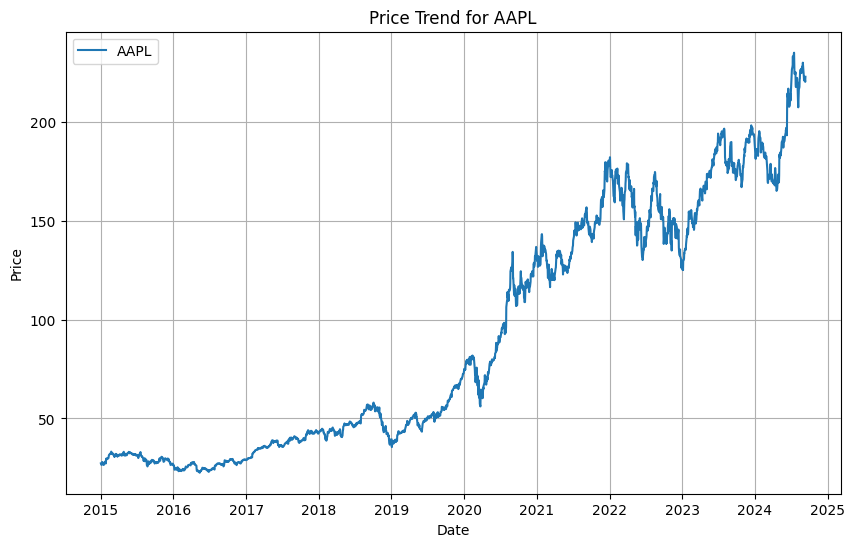

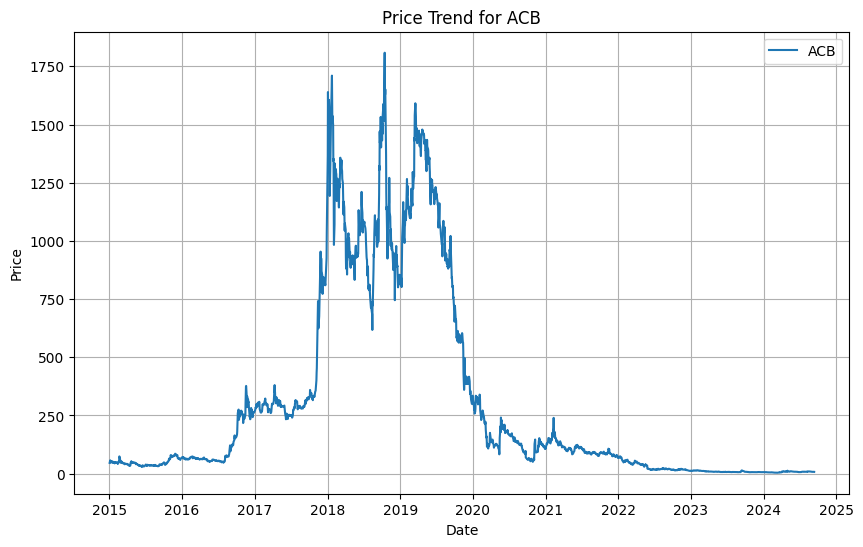

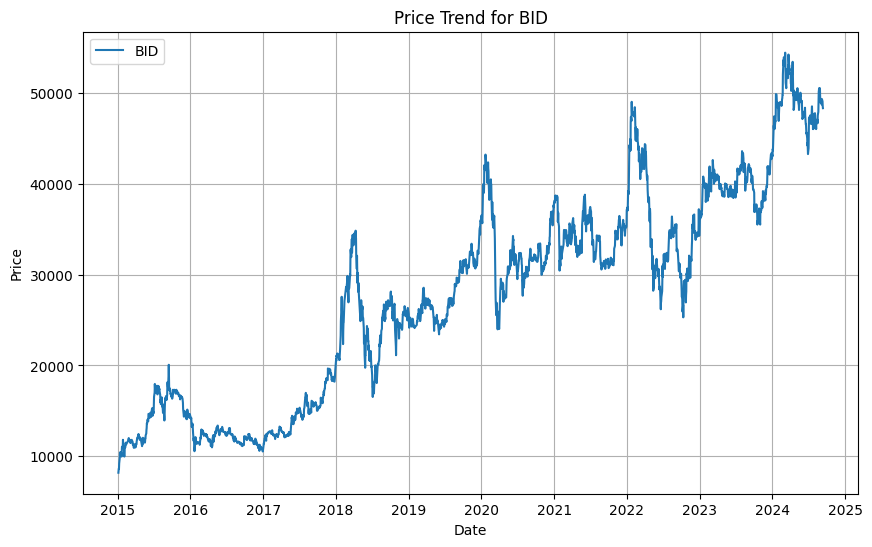

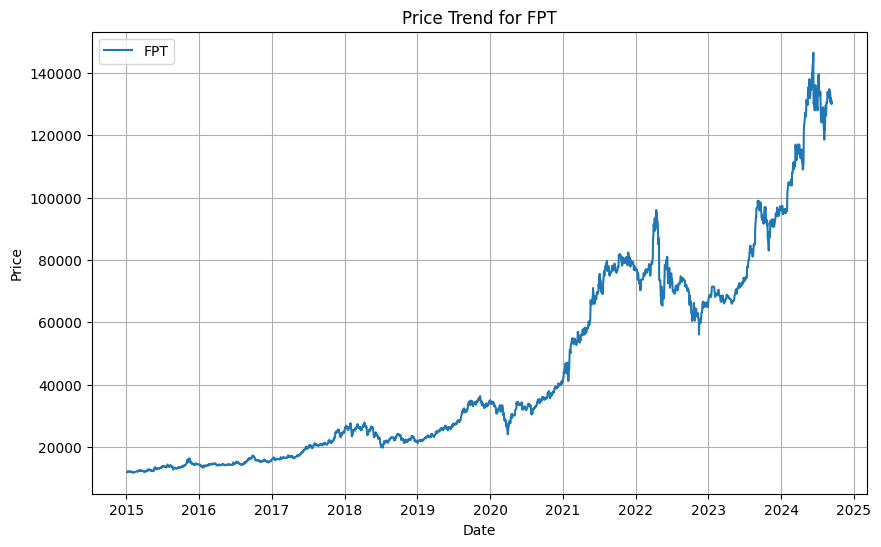

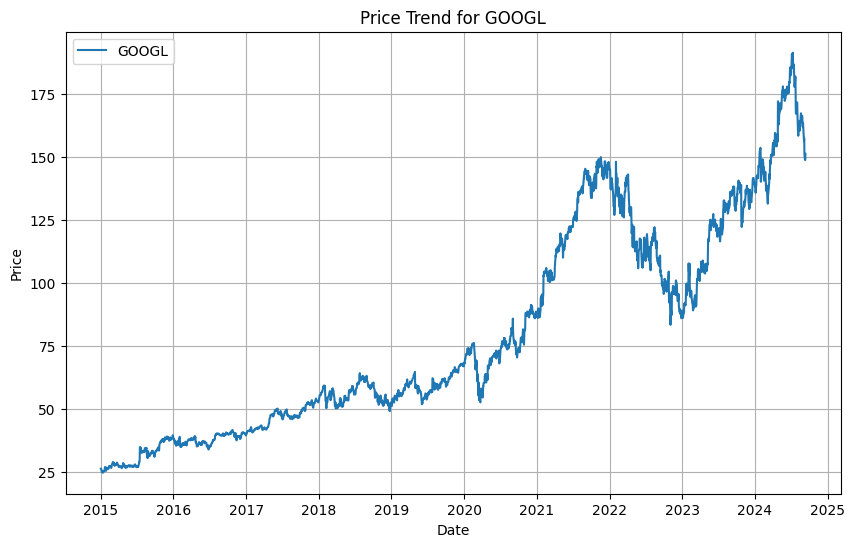

In [66]:
plot_price_line(aapl_data, "AAPL")
plot_price_line(acb_data, "ACB")
plot_price_line(bid_data, "BID")
plot_price_line(fpt_data, "FPT")
plot_price_line(googl_data, "GOOGL")

In [67]:
# Function to clean and convert "Price" column to numeric and calculate statistics
def calculate_price_statistics(dataframe, dataset_name):
    # Check if the 'Price' column is a string, apply string replacement only if necessary
    if dataframe["Price"].dtype == 'object':
        dataframe["Price"] = pd.to_numeric(dataframe["Price"].str.replace(',', '').str.replace('$', ''), errors='coerce')
    statistics = dataframe['Price'].describe()  # Get summary statistics for "Price"
    return statistics

# Calculate statistics for each dataset before differencing
aapl_stats = calculate_price_statistics(aapl_data, "AAPL")
acb_stats = calculate_price_statistics(acb_data, "ACB")
bid_stats = calculate_price_statistics(bid_data, "BID")
fpt_stats = calculate_price_statistics(fpt_data, "FPT")
googl_stats = calculate_price_statistics(googl_data, "GOOGL")

# Show the statistics for each stock
all_stats = pd.DataFrame({
    "AAPL": aapl_stats,
    "ACB": acb_stats,
    "BID": bid_stats,
    "FPT": fpt_stats,
    "GOOGL": googl_stats
})


print(all_stats)

              AAPL          ACB           BID            FPT        GOOGL
count  2440.000000  2431.000000   2418.000000    2418.000000  2440.000000
mean     91.995123   302.871270  27744.743424   45019.095079    79.858602
std      61.428696   423.513462  11432.178840   32566.692381    41.304424
min      22.590000     3.910000   8197.000000   11722.700000    24.850000
25%      36.650000    33.714500  16086.125000   18952.475000    47.007500
50%      61.050000    89.900000  29461.300000   31561.200000    62.640000
75%     149.172500   312.162000  35772.600000   70749.000000   115.387500
max     234.820000  1808.400000  54400.000000  146500.000000   191.180000


# Kiểm định null

In [68]:
# Function to perform ADF test and return the result
def adf_test(dataframe, dataset_name):
    dataframe = clean_price_column(dataframe)
    price_series = dataframe['Price'].dropna()  # Dropping NaN values
    result = adfuller(price_series)
    print(f"ADF Test for {dataset_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    print("------")

# Perform ADF test for each dataset
adf_test(aapl_data, "AAPL")
adf_test(acb_data, "ACB")
adf_test(bid_data, "BID")
adf_test(fpt_data, "FPT")
adf_test(googl_data, "GOOGL")

ADF Test for AAPL:
ADF Statistic: -2.005085144298829
p-value: 0.2843479014186483
Critical Values: {'1%': -3.4330439182185093, '5%': -2.862730143690387, '10%': -2.5674035621263696}
------
ADF Test for ACB:
ADF Statistic: -1.6757332261162032
p-value: 0.44365681232040777
Critical Values: {'1%': -3.433068556739703, '5%': -2.86274102375869, '10%': -2.5674093548705312}
------
ADF Test for BID:
ADF Statistic: -1.4628659270513984
p-value: 0.5517945892308431
Critical Values: {'1%': -3.433058423074162, '5%': -2.8627365488673258, '10%': -2.567406972356031}
------
ADF Test for FPT:
ADF Statistic: -2.4779510211147655
p-value: 0.12093165927516564
Critical Values: {'1%': -3.4330867606360274, '5%': -2.862749062318083, '10%': -2.5674136347538057}
------
ADF Test for GOOGL:
ADF Statistic: -1.4677425203539842
p-value: 0.5494040562123206
Critical Values: {'1%': -3.433060668465553, '5%': -2.8627375404034843, '10%': -2.567407500267908}
------


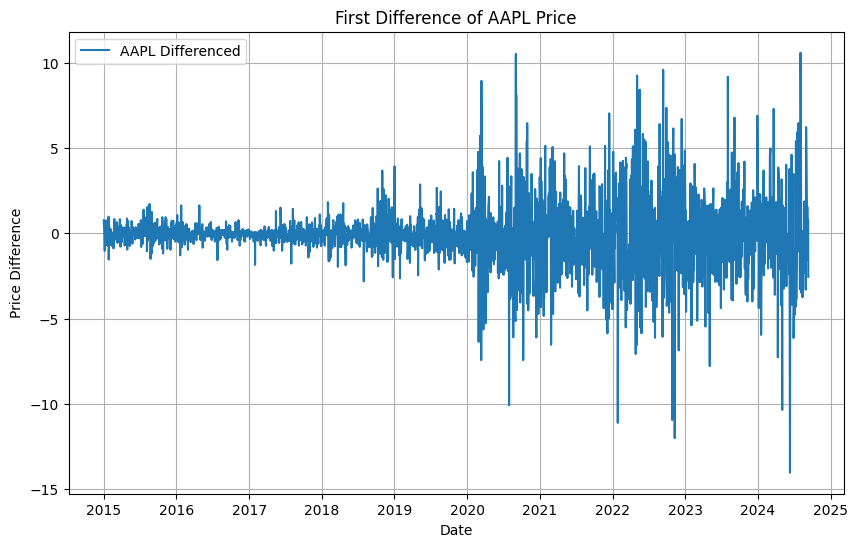

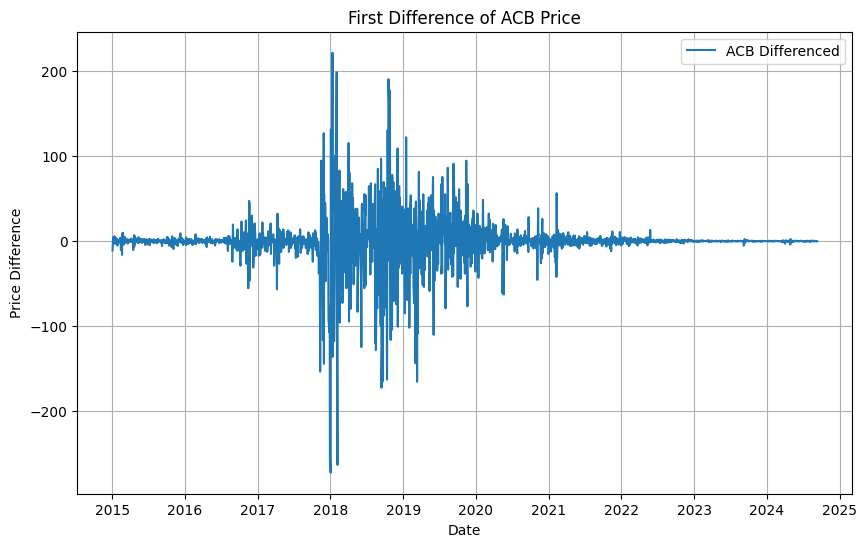

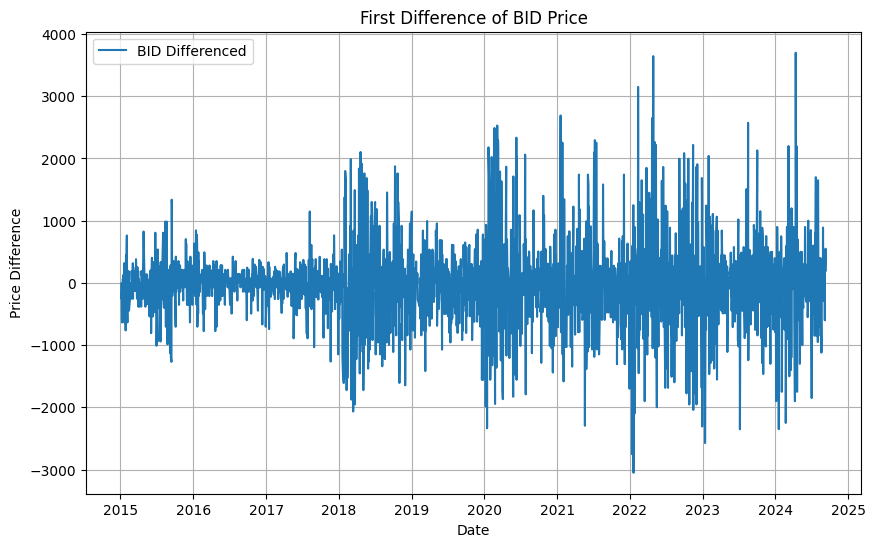

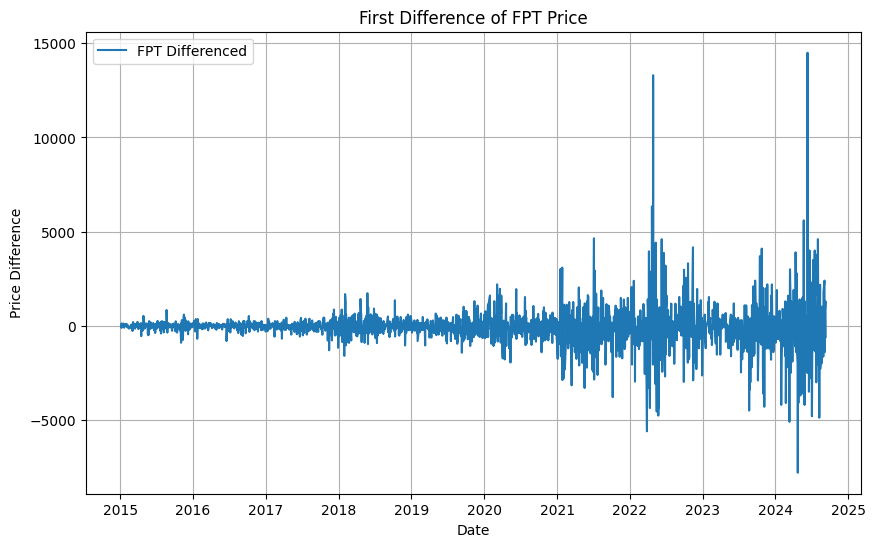

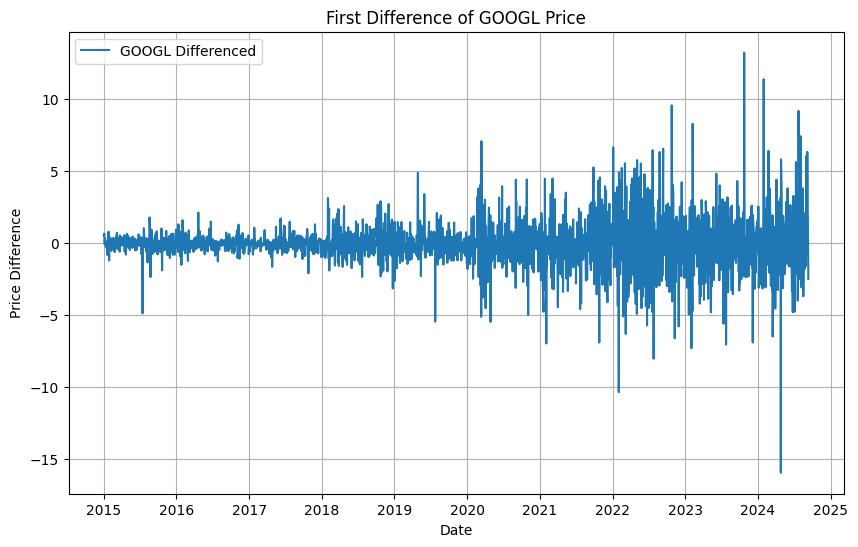

In [69]:
# Function to perform differencing and plot the differenced series
def plot_differencing(dataframe, dataset_name):
    dataframe = clean_price_column(dataframe)
    dataframe['Price_diff'] = dataframe['Price'].diff().dropna()  # Apply differencing
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors='coerce')  # Convert Date to datetime
    
    # Plot the differenced series
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Date'], dataframe['Price_diff'], label=f"{dataset_name} Differenced")
    plt.title(f"First Difference of {dataset_name} Price")
    plt.xlabel("Date")
    plt.ylabel("Price Difference")
    plt.grid(True)
    plt.legend()
    plt.show()

# Perform differencing and plot for each dataset
plot_differencing(aapl_data, "AAPL")
plot_differencing(acb_data, "ACB")
plot_differencing(bid_data, "BID")
plot_differencing(fpt_data, "FPT")
plot_differencing(googl_data, "GOOGL")

In [70]:
# Function to perform differencing and ADF test
def adf_test_after_differencing(dataframe, dataset_name):
    dataframe = clean_price_column(dataframe)
    dataframe['Price_diff'] = dataframe['Price'].diff().dropna()  # Apply differencing
    
    # ADF test on differenced data
    result = adfuller(dataframe['Price_diff'].dropna())
    
    print(f"ADF Test after Differencing for {dataset_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    print("------")

# Perform differencing and ADF test for each dataset
adf_test_after_differencing(aapl_data, "AAPL")
adf_test_after_differencing(acb_data, "ACB")
adf_test_after_differencing(bid_data, "BID")
adf_test_after_differencing(fpt_data, "FPT")
adf_test_after_differencing(googl_data, "GOOGL")

ADF Test after Differencing for AAPL:
ADF Statistic: -16.108277324225377
p-value: 5.0452045476837493e-29
Critical Values: {'1%': -3.4330439182185093, '5%': -2.862730143690387, '10%': -2.5674035621263696}
------
ADF Test after Differencing for ACB:
ADF Statistic: -10.51078335516285
p-value: 1.0258402974581829e-18
Critical Values: {'1%': -3.433068556739703, '5%': -2.86274102375869, '10%': -2.5674093548705312}
------
ADF Test after Differencing for BID:
ADF Statistic: -50.479759705022985
p-value: 0.0
Critical Values: {'1%': -3.43305954530467, '5%': -2.862737044430077, '10%': -2.5674072362026337}
------
ADF Test after Differencing for FPT:
ADF Statistic: -9.03661601514882
p-value: 5.268266383777457e-15
Critical Values: {'1%': -3.433090201041693, '5%': -2.862750581542575, '10%': -2.567414443618994}
------
ADF Test after Differencing for GOOGL:
ADF Statistic: -10.99563556688874
p-value: 6.882739092405365e-20
Critical Values: {'1%': -3.433060668465553, '5%': -2.8627375404034843, '10%': -2.567

In [71]:
# It seems that the "Price" column already contains numeric values in some datasets.
# We need to handle it properly by checking if the column is string before applying string operations.

def calculate_differencing_statistics(dataframe, dataset_name):
    # Check if the 'Price' column is a string, apply string replacement only if necessary
    if dataframe["Price"].dtype == 'object':
        dataframe["Price"] = pd.to_numeric(dataframe["Price"].str.replace(',', '').str.replace('$', ''), errors='coerce')
    dataframe['Price_diff'] = dataframe['Price'].diff().dropna()  # Apply differencing
    statistics = dataframe['Price_diff'].describe()  # Get summary statistics
    return statistics

# Calculate statistics for each dataset after differencing
aapl_stats = calculate_differencing_statistics(aapl_data, "AAPL")
acb_stats = calculate_differencing_statistics(acb_data, "ACB")
bid_stats = calculate_differencing_statistics(bid_data, "BID")
fpt_stats = calculate_differencing_statistics(fpt_data, "FPT")
googl_stats = calculate_differencing_statistics(googl_data, "GOOGL")

# Show the statistics for each stock
all_stats = pd.DataFrame({
    "AAPL": aapl_stats,
    "ACB": acb_stats,
    "BID": bid_stats,
    "FPT": fpt_stats,
    "GOOGL": googl_stats
})


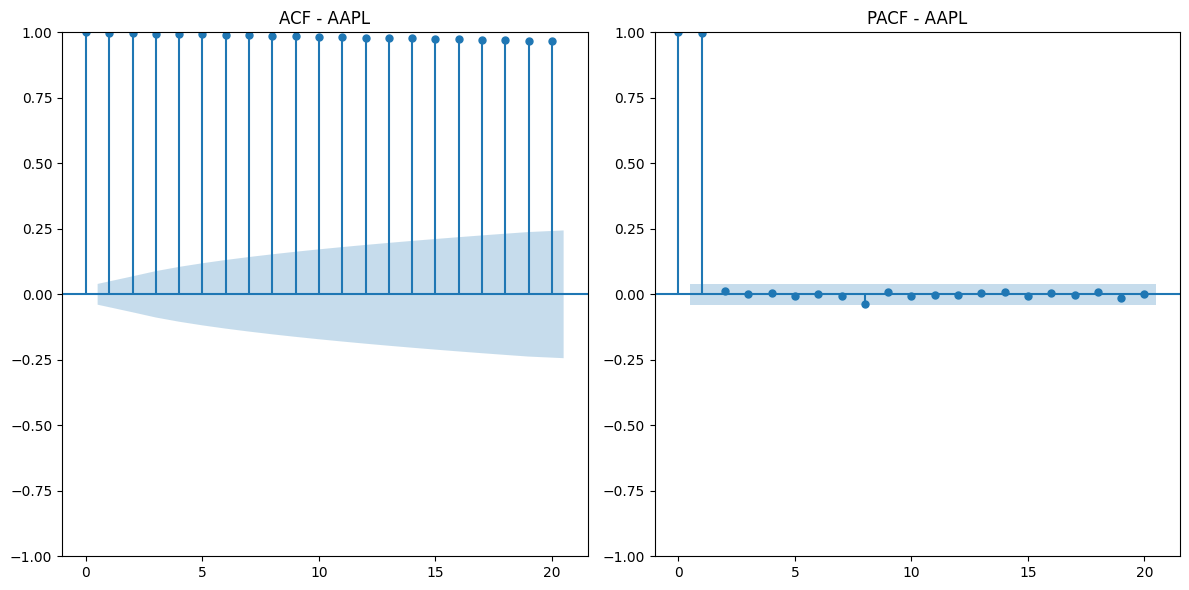

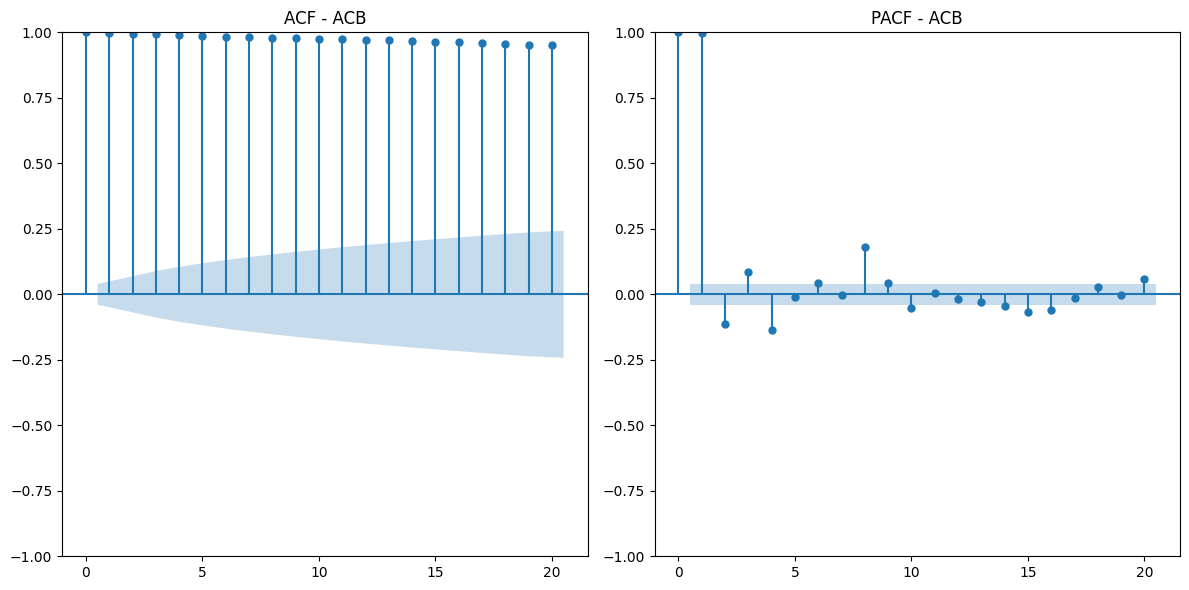

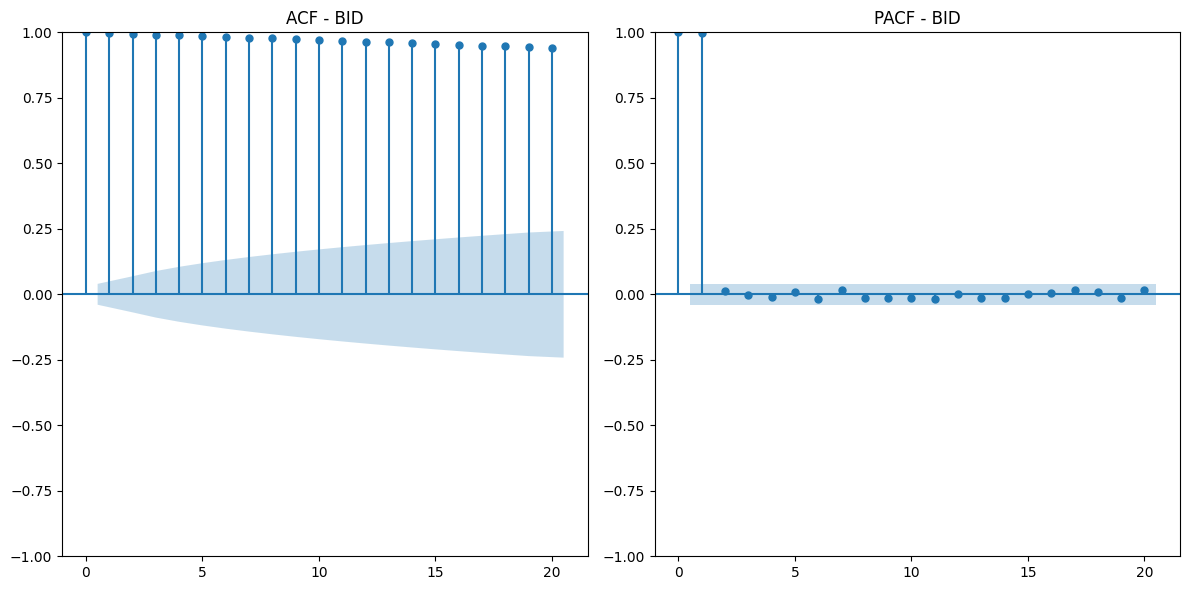

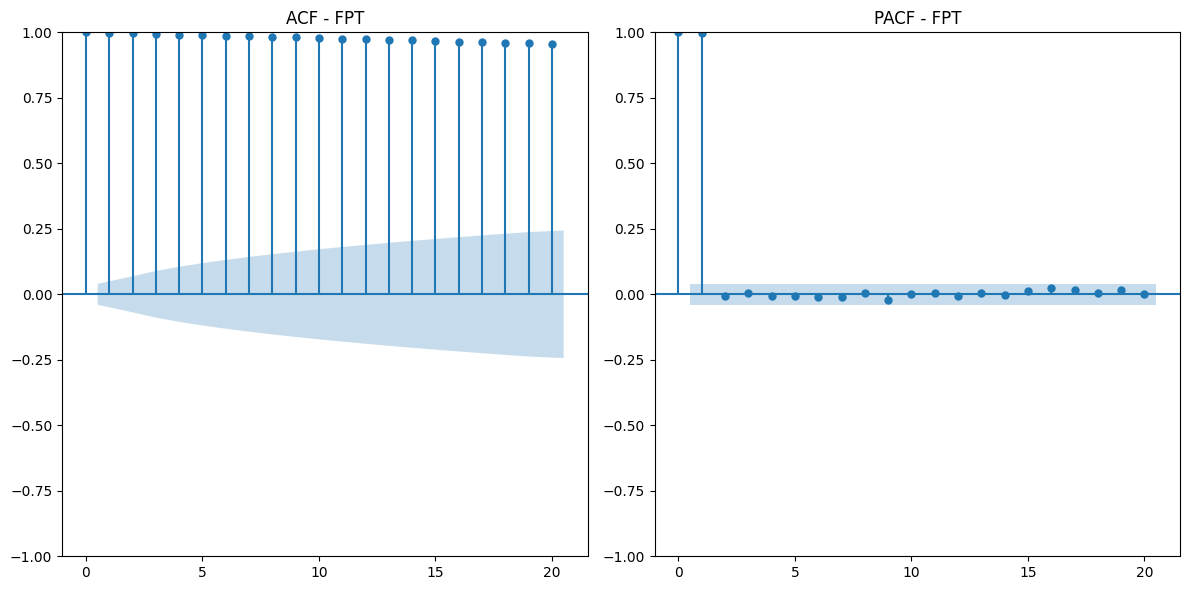

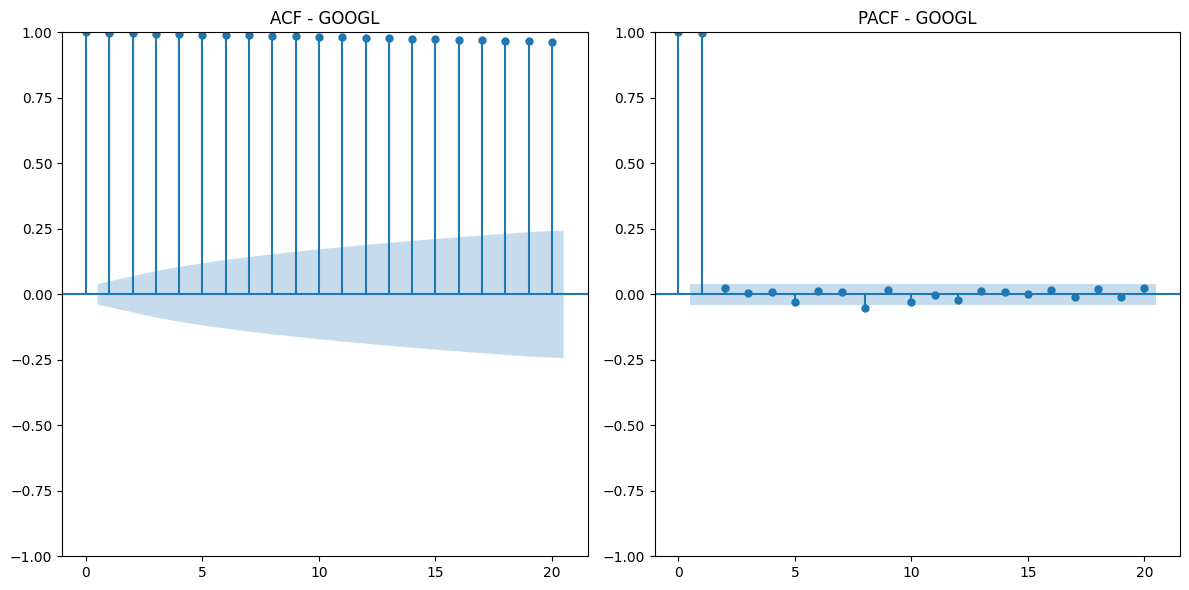

In [72]:
# Lấy giá đóng cửa (Close) của từng mã cổ phiếu
aapl_close = aapl_data['Price']
acb_close = acb_data['Price']
bid_close = bid_data['Price']
fpt_close = fpt_data['Price']
googl_close = googl_data['Price']

# Hàm để vẽ ACF và PACF cho một chuỗi thời gian
def plot_acf_pacf(data, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=20, ax=plt.gca())
    plt.title(f'ACF - {title}')
    
    plt.subplot(122)
    plot_pacf(data, lags=20, ax=plt.gca())
    plt.title(f'PACF - {title}')
    
    plt.tight_layout()
    plt.show()

# Áp dụng cho từng mã cổ phiếu
plot_acf_pacf(aapl_close, 'AAPL')
plot_acf_pacf(acb_close, 'ACB')
plot_acf_pacf(bid_close, 'BID')
plot_acf_pacf(fpt_close, 'FPT')
plot_acf_pacf(googl_close, 'GOOGL')